In [40]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Literal

from explore.gcp.storage import gcp
from explore.src.preprocess.clean_stats import Cleaning
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.stats_visual import StatsVisuals

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
df = gcp.read_df_from_bucket(bucket_name="fbref_db", blob_name="gca.csv")

[03/10/24 13:49:23] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=957839;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=873740;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

[03/10/24 13:49:24] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=690328;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=307995;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born   90s  shot_creating_actions  sca_per_90  pass_live_sca  \
0  26.0  1990.0  24.3                   46.0        1.90           24.0   
1  21.0  1995.0   1.5                    1.0        0.65            0.0   
2  21.0  1995.0   5.7                    5.0        0.87            4.0   
3  30.0  1986.0  11.7                   27.0        2.30           24.0   
4  27.0  1989.0   5.5                    2.0        0.36            2.0   

   pass_dead_sca  take_on_sca  shot_sca  foul_drawn_sca  defensive_action_sca  \
0           12.0          6.0       2.0             1.0                   1.0   
1            0.0          0.0       1.0             0.0                   0.0   
2            1.0          0.0       0.0             0.0                   0.0   
3            1.0          0.0       2.0             0.0                   0.0   
4            0.0          0.0       0.0             0.0                   0.0   

   goal_creating_actions  gca_per_90  pass_live_gca  pass_dead_gca  \
0                    4.0        0.16            2.0            0.0   
1                    0.0        0.00            0.0            0.0   
2                    0.0        0.00            0.0            0.0   
3                    4.0        0.34            3.0            0.0   
4                    0.0        0.00            0.0            0.0   

   take_on_gca  shot_gca  foul_drawn_gca  defensive_action_gca     season  
0          2.0       0.0             0.0                   0.0  2017-2018  
1          0.0       0.0             0.0                   0.0  2017-2018  
2          0.0       0.0             0.0                   0.0  2017-2018  
3          0.0       1.0             0.0                   0.0  2017-2018  
4          0.0       0.0             0.0                   0.0  2017-2018

In [4]:
describe_data(df)

Data Types  Null Counts  Null %  Unique Values     Min  \
rk                         int64            0    0.00           2920     1.0   
age                      float64            3    0.02             29    14.0   
born                     float64            3    0.02             32  1977.0   
90s                      float64            0    0.00            381     0.0   
shot_creating_actions    float64           22    0.12            202     0.0   
sca_per_90               float64           23    0.12            765     0.0   
pass_live_sca            float64           22    0.12            141     0.0   
pass_dead_sca            float64           22    0.12             68     0.0   
take_on_sca              float64           22    0.12             38     0.0   
shot_sca                 float64           22    0.12             25     0.0   
foul_drawn_sca           float64           22    0.12             29     0.0   
defensive_action_sca     float64           22    0.12              8     0.0   
goal_creating_actions    float64           22    0.12             40     0.0   
gca_per_90               float64           23    0.12            215     0.0   
pass_live_gca            float64           22    0.12             28     0.0   
pass_dead_gca            float64           22    0.12             11     0.0   
take_on_gca              float64           22    0.12             11     0.0   
shot_gca                 float64           22    0.12              8     0.0   
foul_drawn_gca           float64           22    0.12              8     0.0   
defensive_action_gca     float64           22    0.12              4     0.0   

                          Max   Median     Mean  Std Dev  Outliers  Outliers %  
rk                     2920.0  1366.00  1371.01   796.36         0        0.00  
age                      42.0    25.00    25.34     4.53        19        0.10  
born                   2008.0  1995.00  1994.35     4.92        38        0.20  
90s                      38.0    11.80    13.44    10.64         0        0.00  
shot_creating_actions   265.0    16.00    26.80    30.88       925        4.84  
sca_per_90               90.0     1.81     2.10     2.85       458        2.40  
pass_live_sca           186.0    12.00    19.25    21.51       863        4.51  
pass_dead_sca            94.0     0.00     2.42     6.25      2203       11.52  
take_on_sca              49.0     0.00     1.62     3.08      1633        8.54  
shot_sca                 31.0     1.00     1.58     2.38      1365        7.14  
foul_drawn_sca           31.0     0.00     1.47     2.48      1294        6.77  
defensive_action_sca      7.0     0.00     0.44     0.82       646        3.38  
goal_creating_actions    43.0     1.00     2.85     4.02      1085        5.67  
gca_per_90               22.5     0.11     0.21     0.51       626        3.27  
pass_live_gca            30.0     1.00     1.96     2.83      1000        5.23  
pass_dead_gca            13.0     0.00     0.19     0.67      2103       11.00  
take_on_gca              14.0     0.00     0.21     0.64      2582       13.50  
shot_gca                  7.0     0.00     0.24     0.59      3485       18.23  
foul_drawn_gca            7.0     0.00     0.21     0.56      2916       15.25  
defensive_action_gca      3.0     0.00     0.04     0.21       754        3.94

In [5]:
df = Cleaning(df).pipeline()

SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB',

In [6]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born   90s  shot_creating_actions  sca_per_90  pass_live_sca  \
0  26.0  1990.0  24.3                   46.0        1.90           24.0   
1  21.0  1995.0   1.5                    1.0        0.65            0.0   
2  21.0  1995.0   5.7                    5.0        0.87            4.0   
3  30.0  1986.0  11.7                   27.0        2.30           24.0   
4  27.0  1989.0   5.5                    2.0        0.36            2.0   

   pass_dead_sca  take_on_sca  shot_sca  foul_drawn_sca  defensive_action_sca  \
0           12.0          6.0       2.0             1.0                   1.0   
1            0.0          0.0       1.0             0.0                   0.0   
2            1.0          0.0       0.0             0.0                   0.0   
3            1.0          0.0       2.0             0.0                   0.0   
4            0.0          0.0       0.0             0.0                   0.0   

   goal_creating_actions  gca_per_90  pass_live_gca  pass_dead_gca  \
0                    4.0        0.16            2.0            0.0   
1                    0.0        0.00            0.0            0.0   
2                    0.0        0.00            0.0            0.0   
3                    4.0        0.34            3.0            0.0   
4                    0.0        0.00            0.0            0.0   

   take_on_gca  shot_gca  foul_drawn_gca  defensive_action_gca     season  \
0          2.0       0.0             0.0                   0.0  2017-2018   
1          0.0       0.0             0.0                   0.0  2017-2018   
2          0.0       0.0             0.0                   0.0  2017-2018   
3          0.0       1.0             0.0                   0.0  2017-2018   
4          0.0       0.0             0.0                   0.0  2017-2018   

  general_pos age_range      country continent  
0    Defender     25-29  Netherlands    Europe  
1  Midfielder     20-24      England    Europe  
2  Midfielder     20-24      England    Europe  
3    Defender     30-34        Italy    Europe  
4    Defender     25-29      Tunisia    Africa

## Statistical Plots

In [7]:
stat_plots = StatisticPlots(df)

In [8]:
df.columns

Index(['rk', 'player', 'nation', 'pos', 'squad', 'comp', 'age', 'born', '90s',
       'shot_creating_actions', 'sca_per_90', 'pass_live_sca', 'pass_dead_sca',
       'take_on_sca', 'shot_sca', 'foul_drawn_sca', 'defensive_action_sca',
       'goal_creating_actions', 'gca_per_90', 'pass_live_gca', 'pass_dead_gca',
       'take_on_gca', 'shot_gca', 'foul_drawn_gca', 'defensive_action_gca',
       'season', 'general_pos', 'age_range', 'country', 'continent'],
      dtype='object')

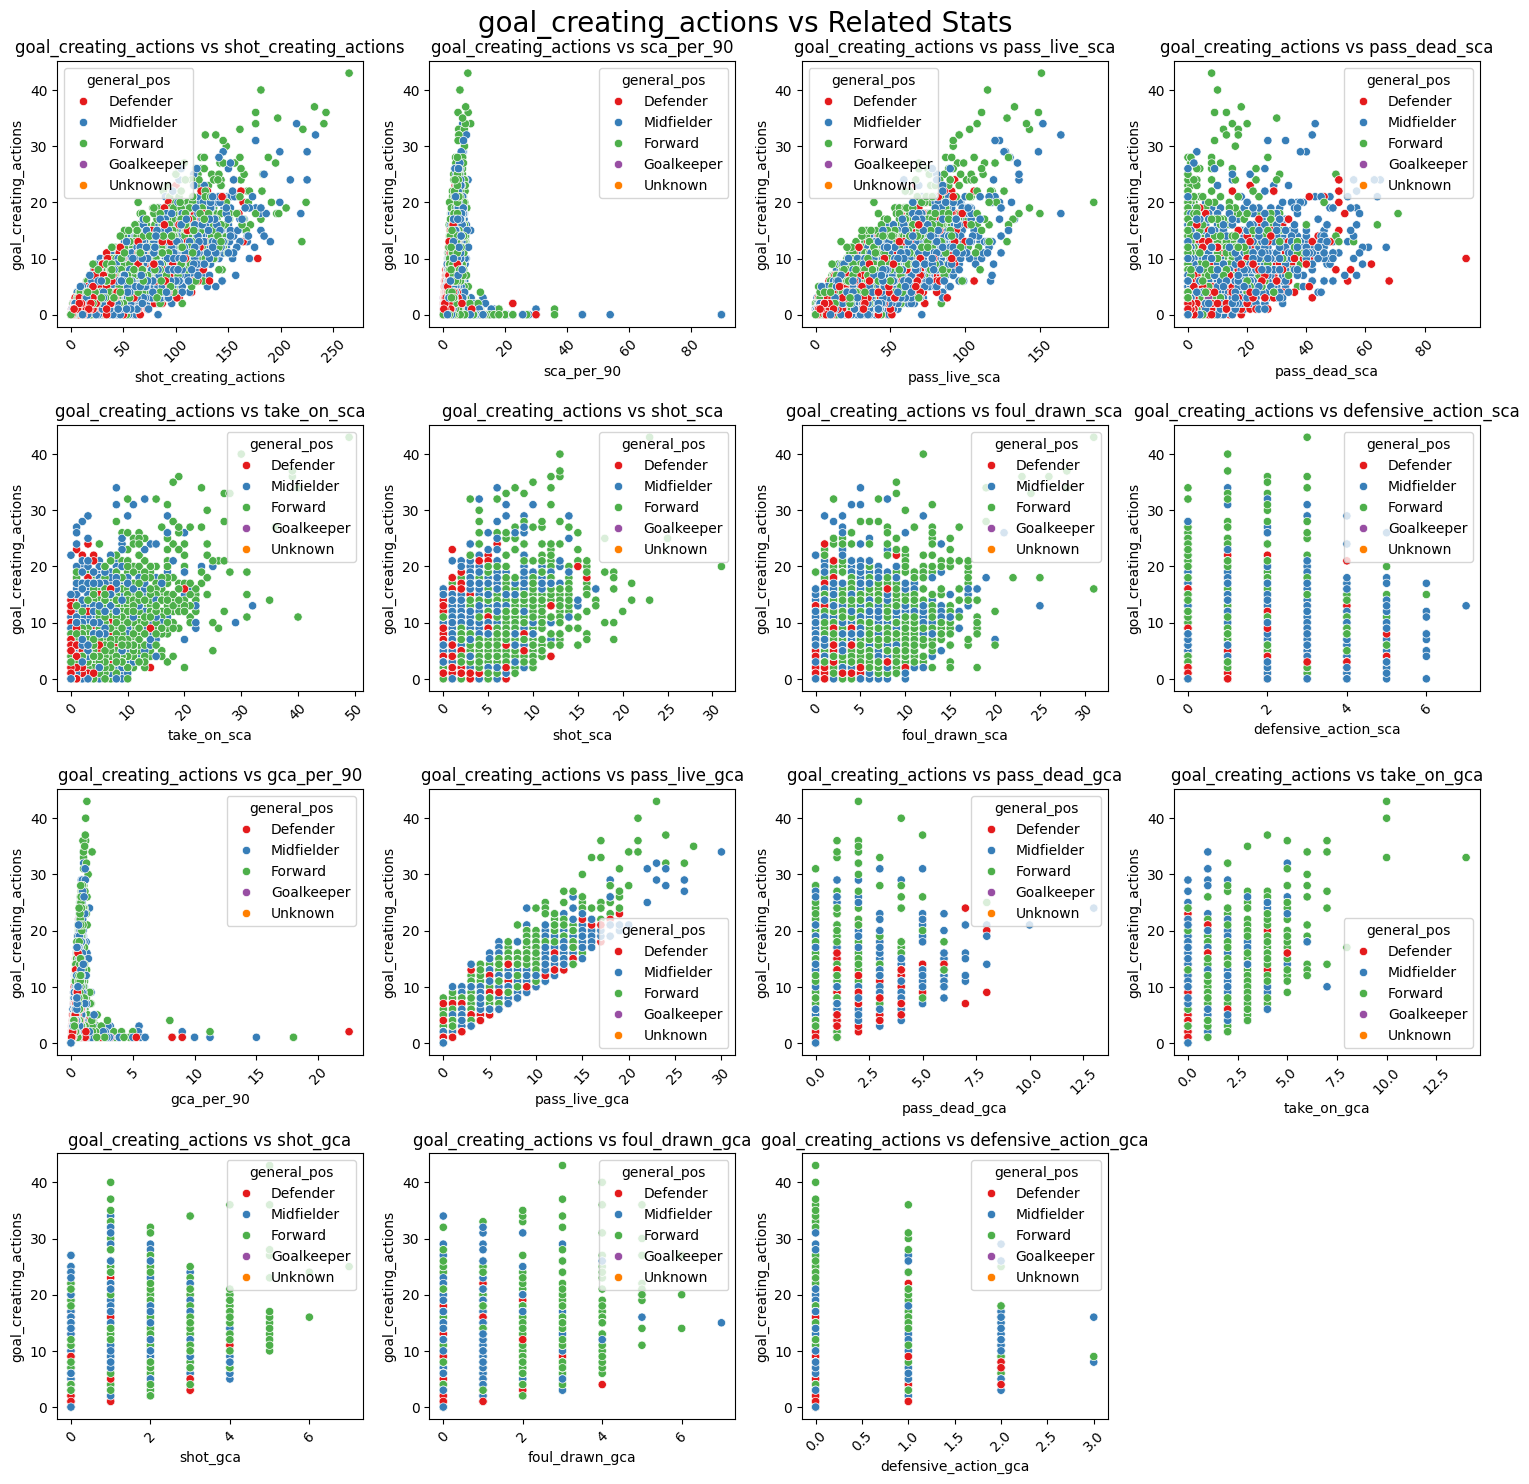

In [9]:
cols = df.columns[9:-5]

# relationship between the through balls and different pass types
stat_plots.relationships(y='goal_creating_actions', X=cols, hue='general_pos', palette='Set1')

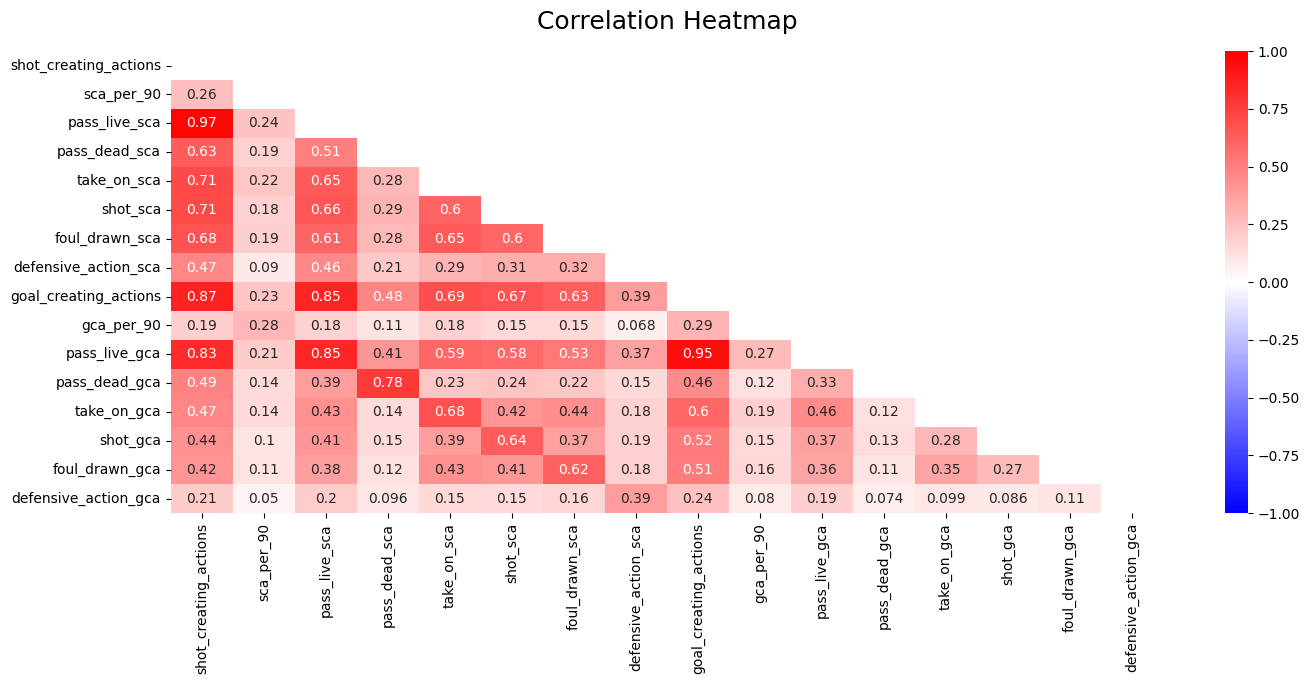

In [10]:
stat_plots.correlation_matrix(cols)

In [13]:
dff = df.loc[df['season'] != '2023-2024']

In [14]:
gca_plots = StatsVisuals(dff)

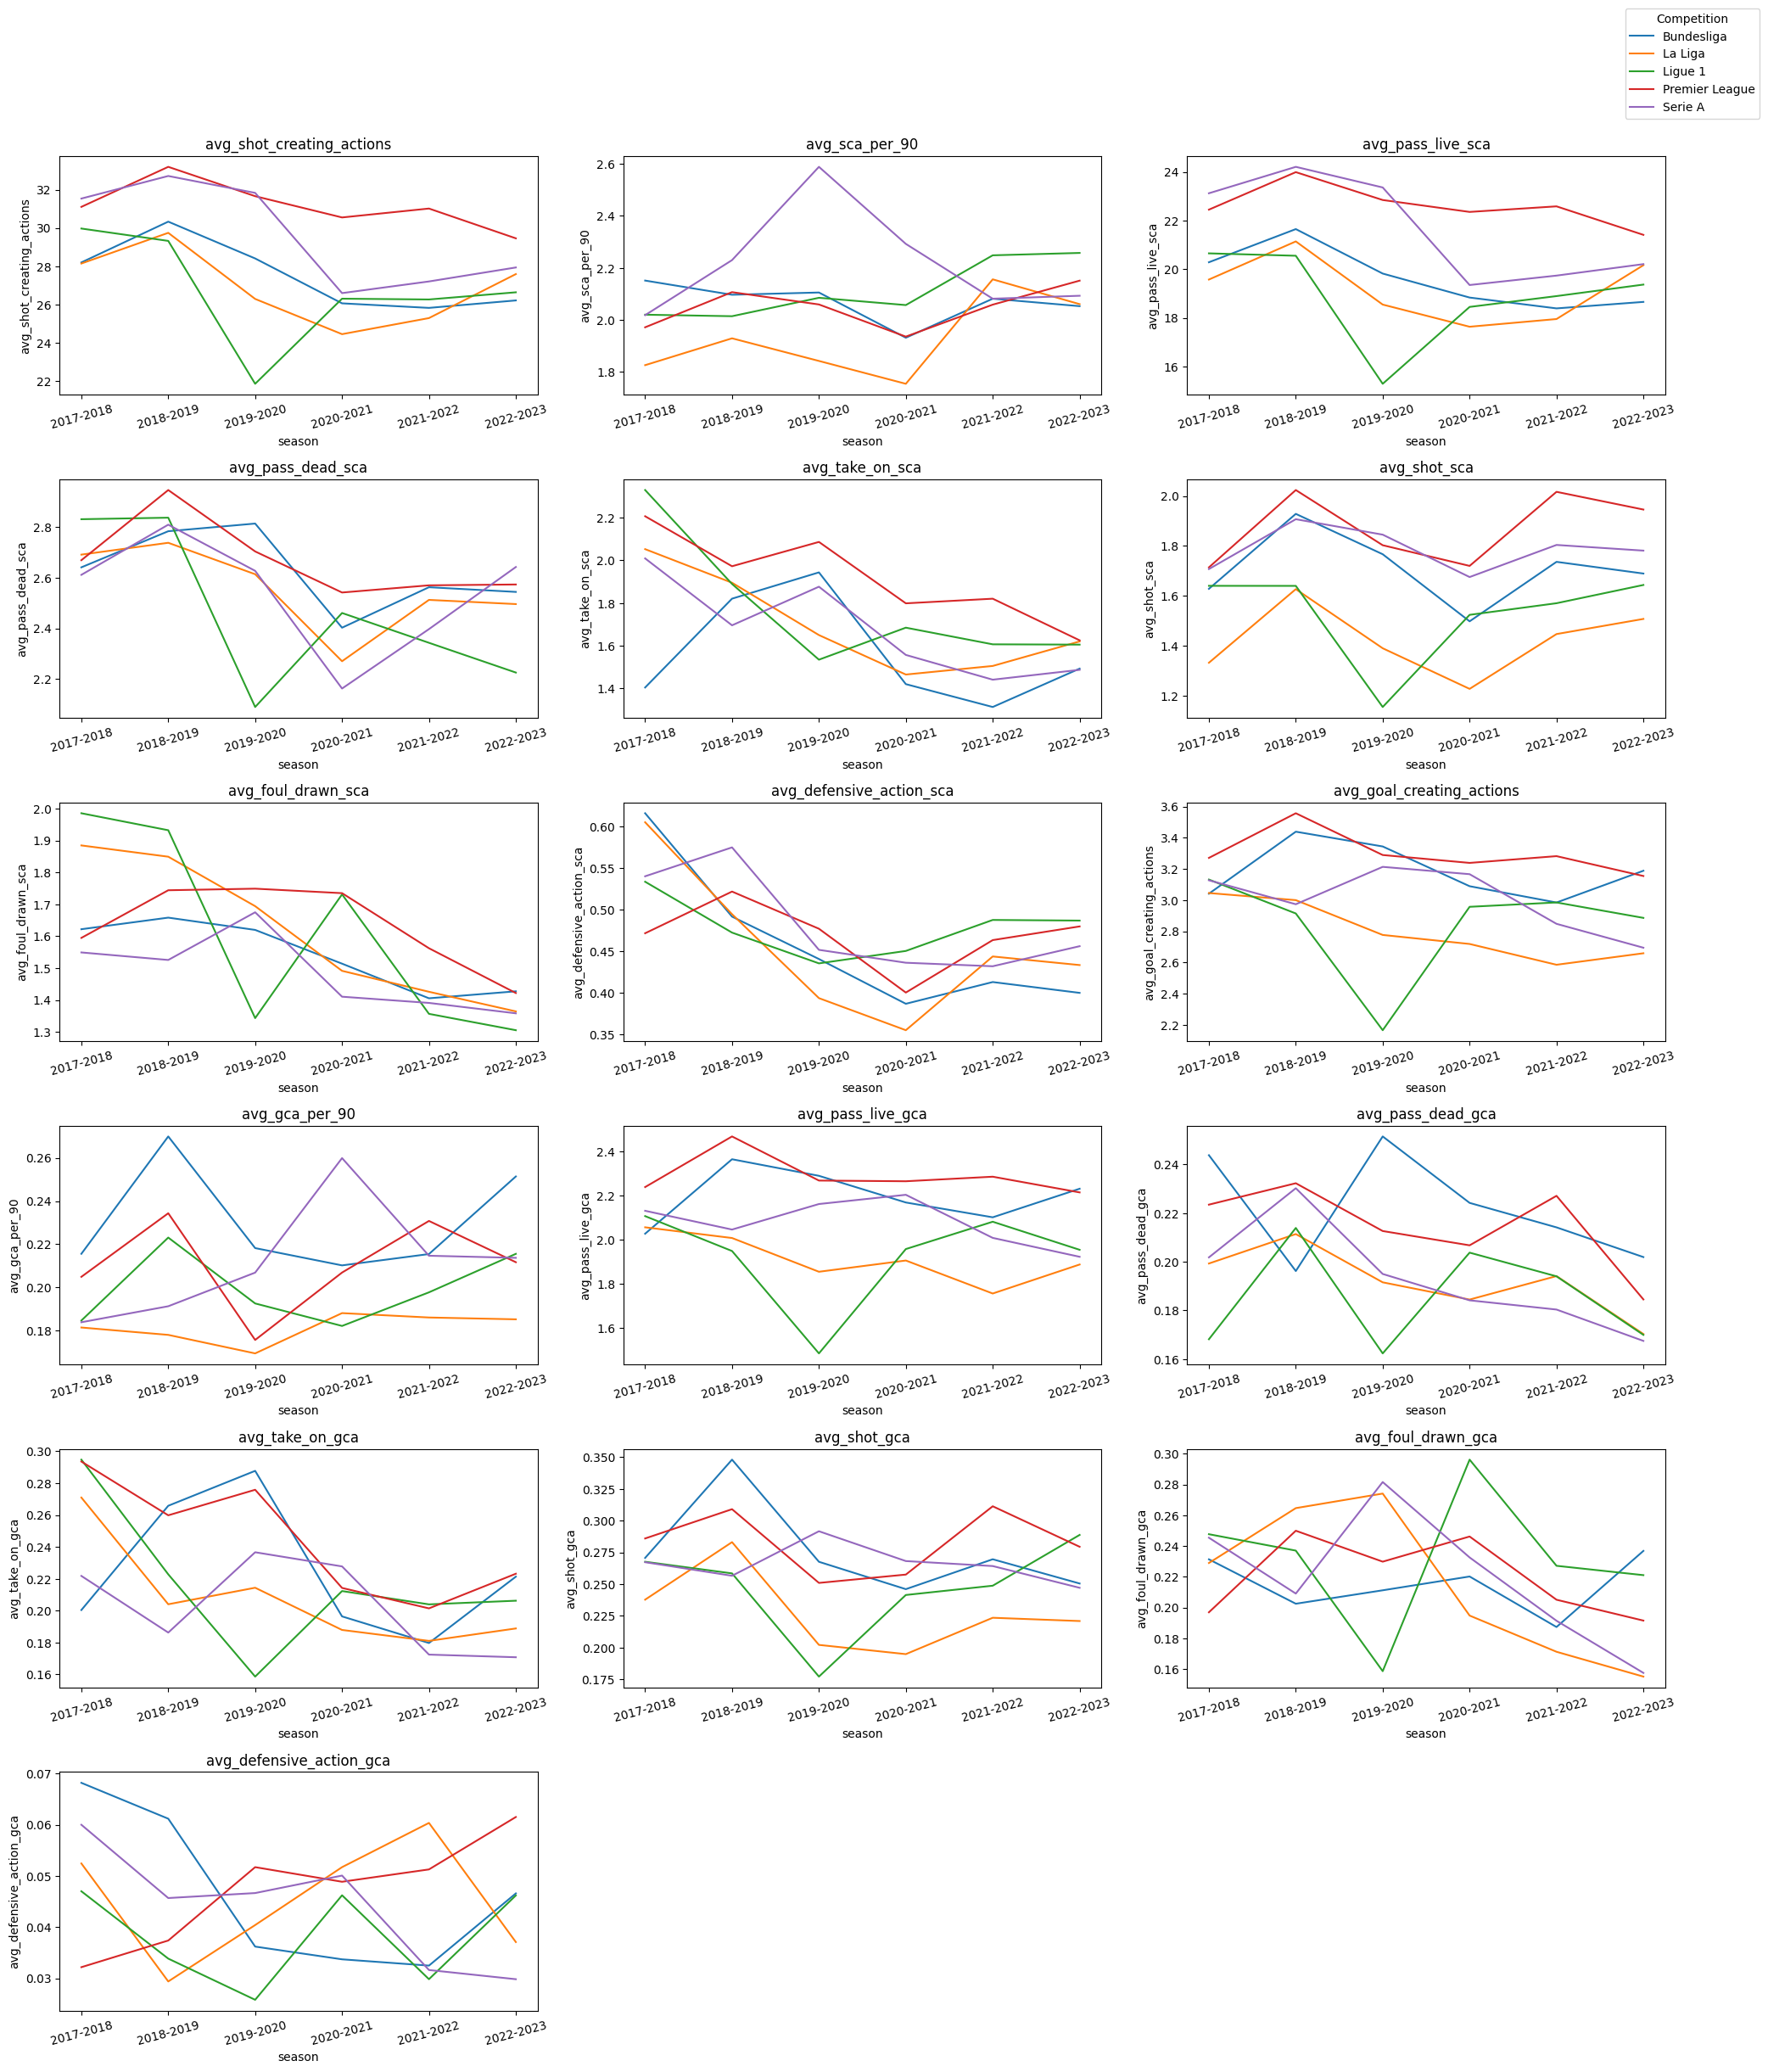

In [15]:
gca_plots.avgs_time_series('comp', cols)

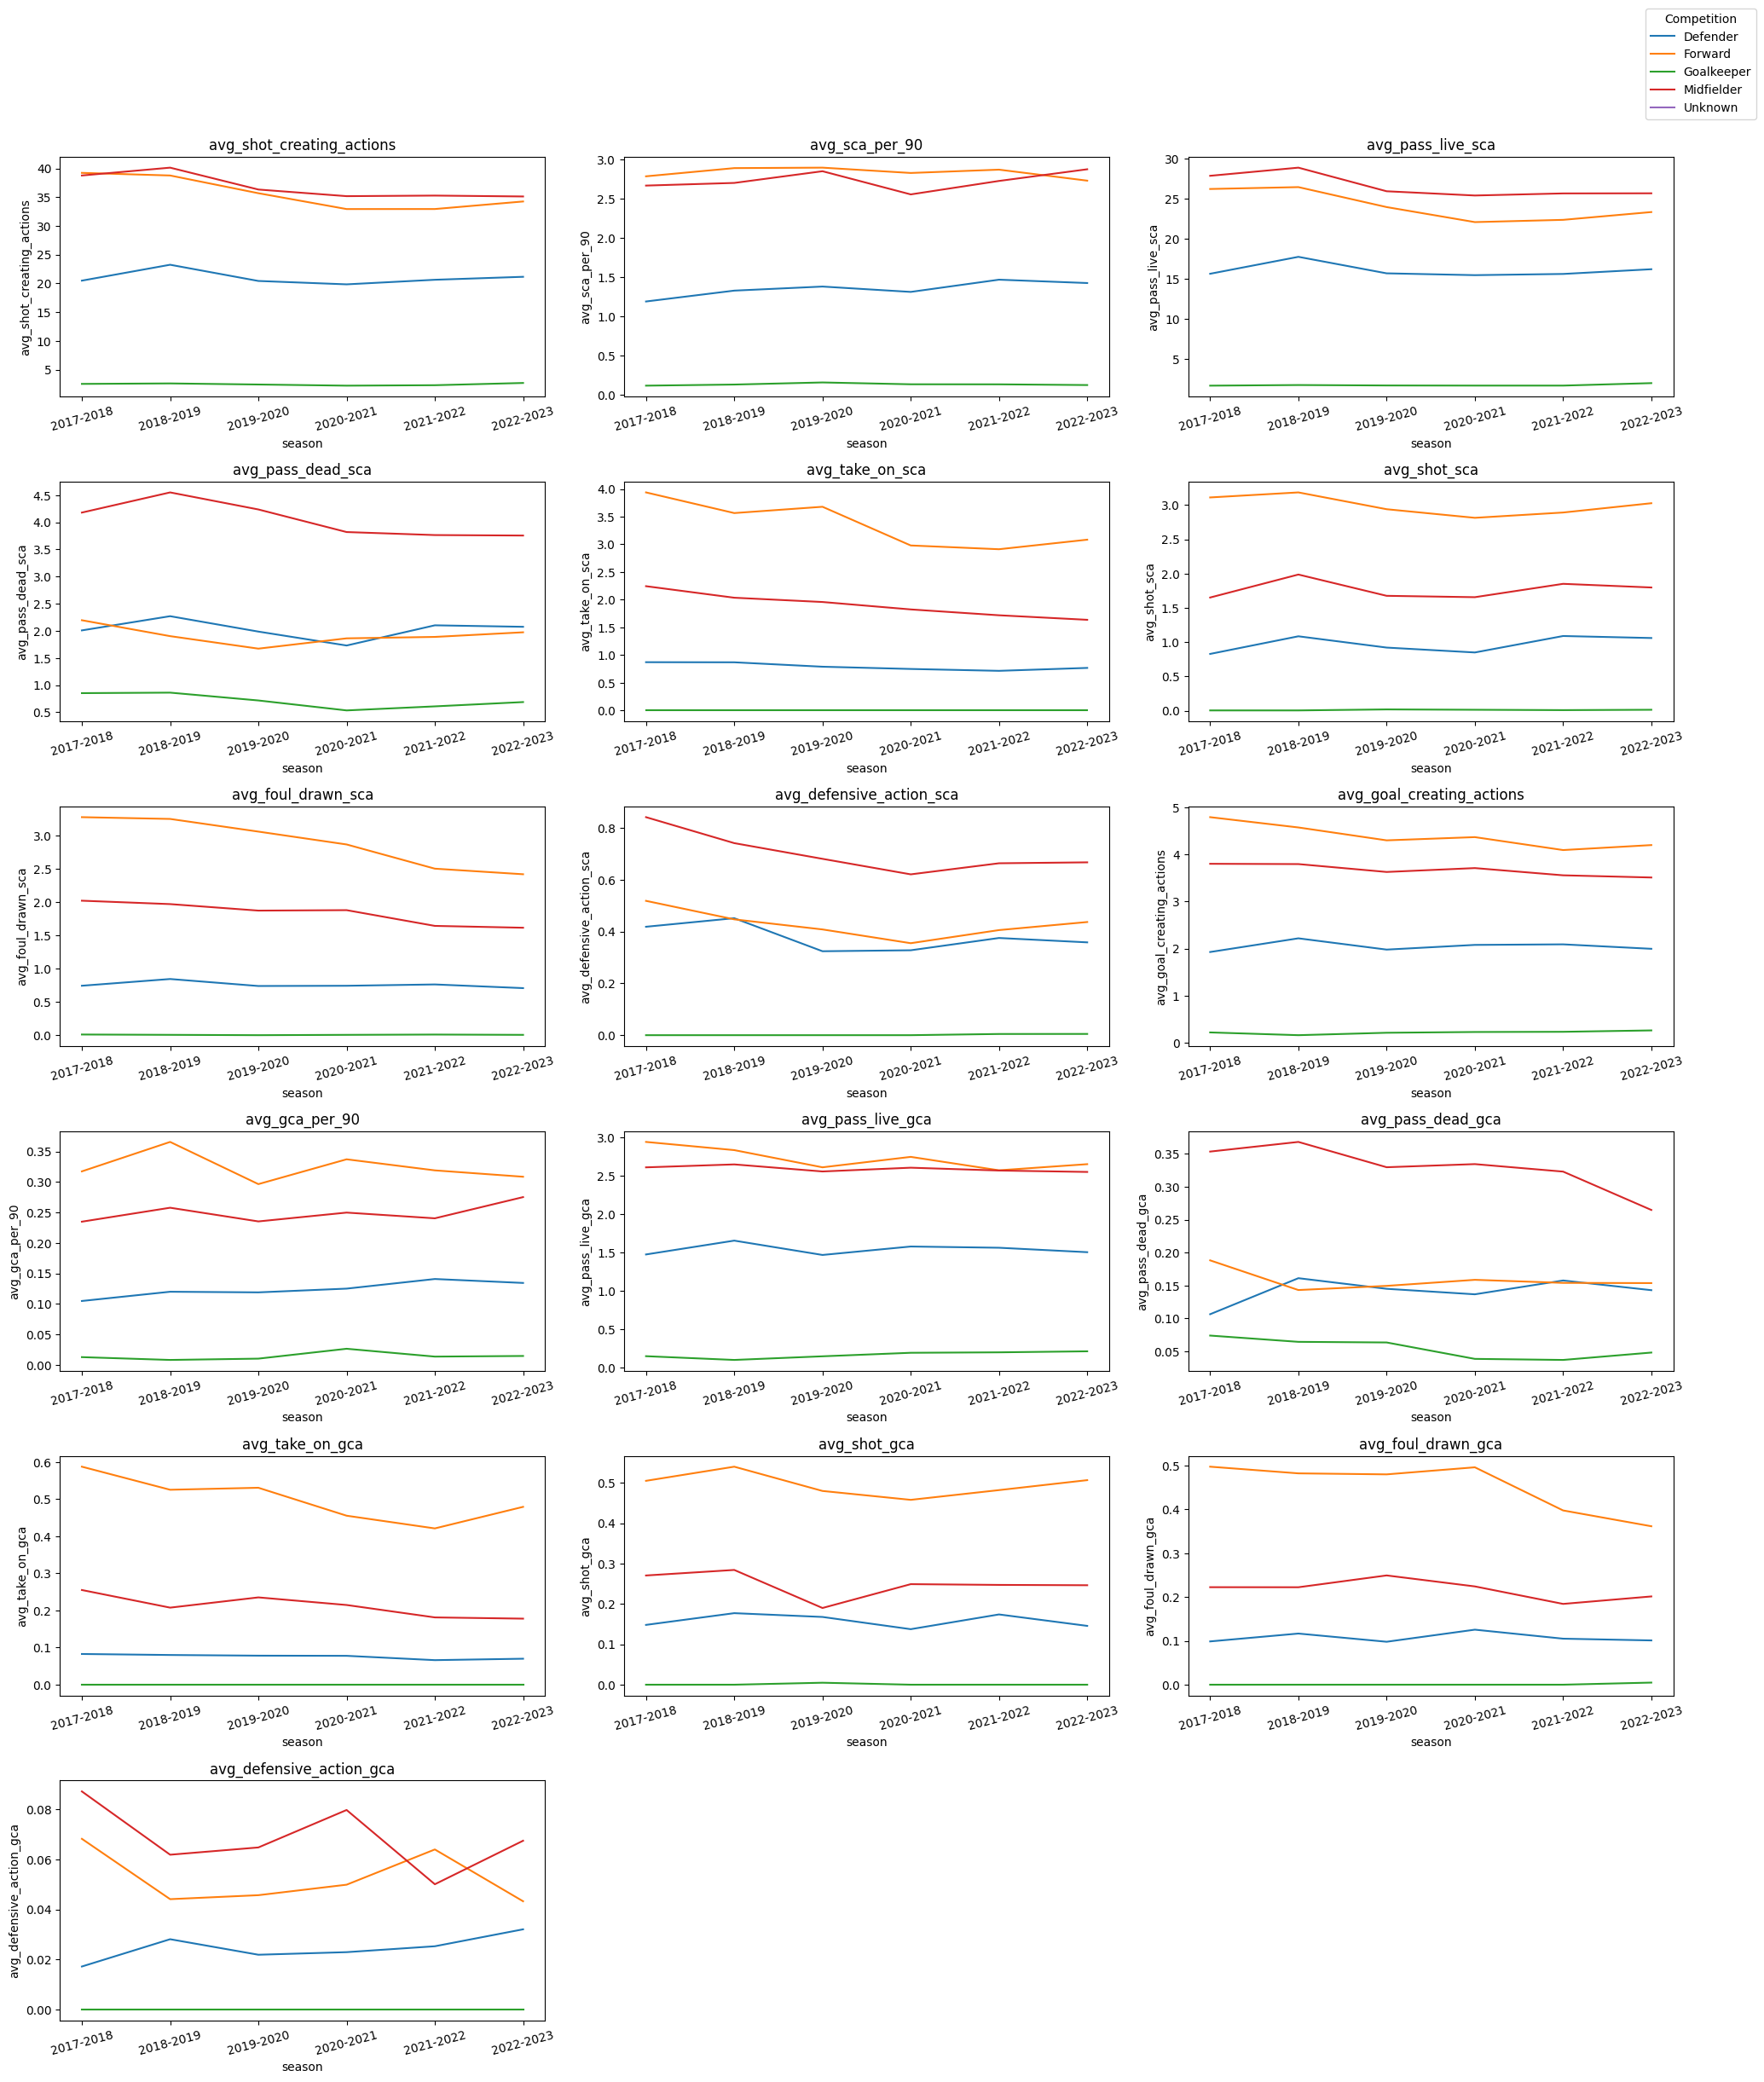

In [16]:
gca_plots.avgs_time_series('general_pos', cols)

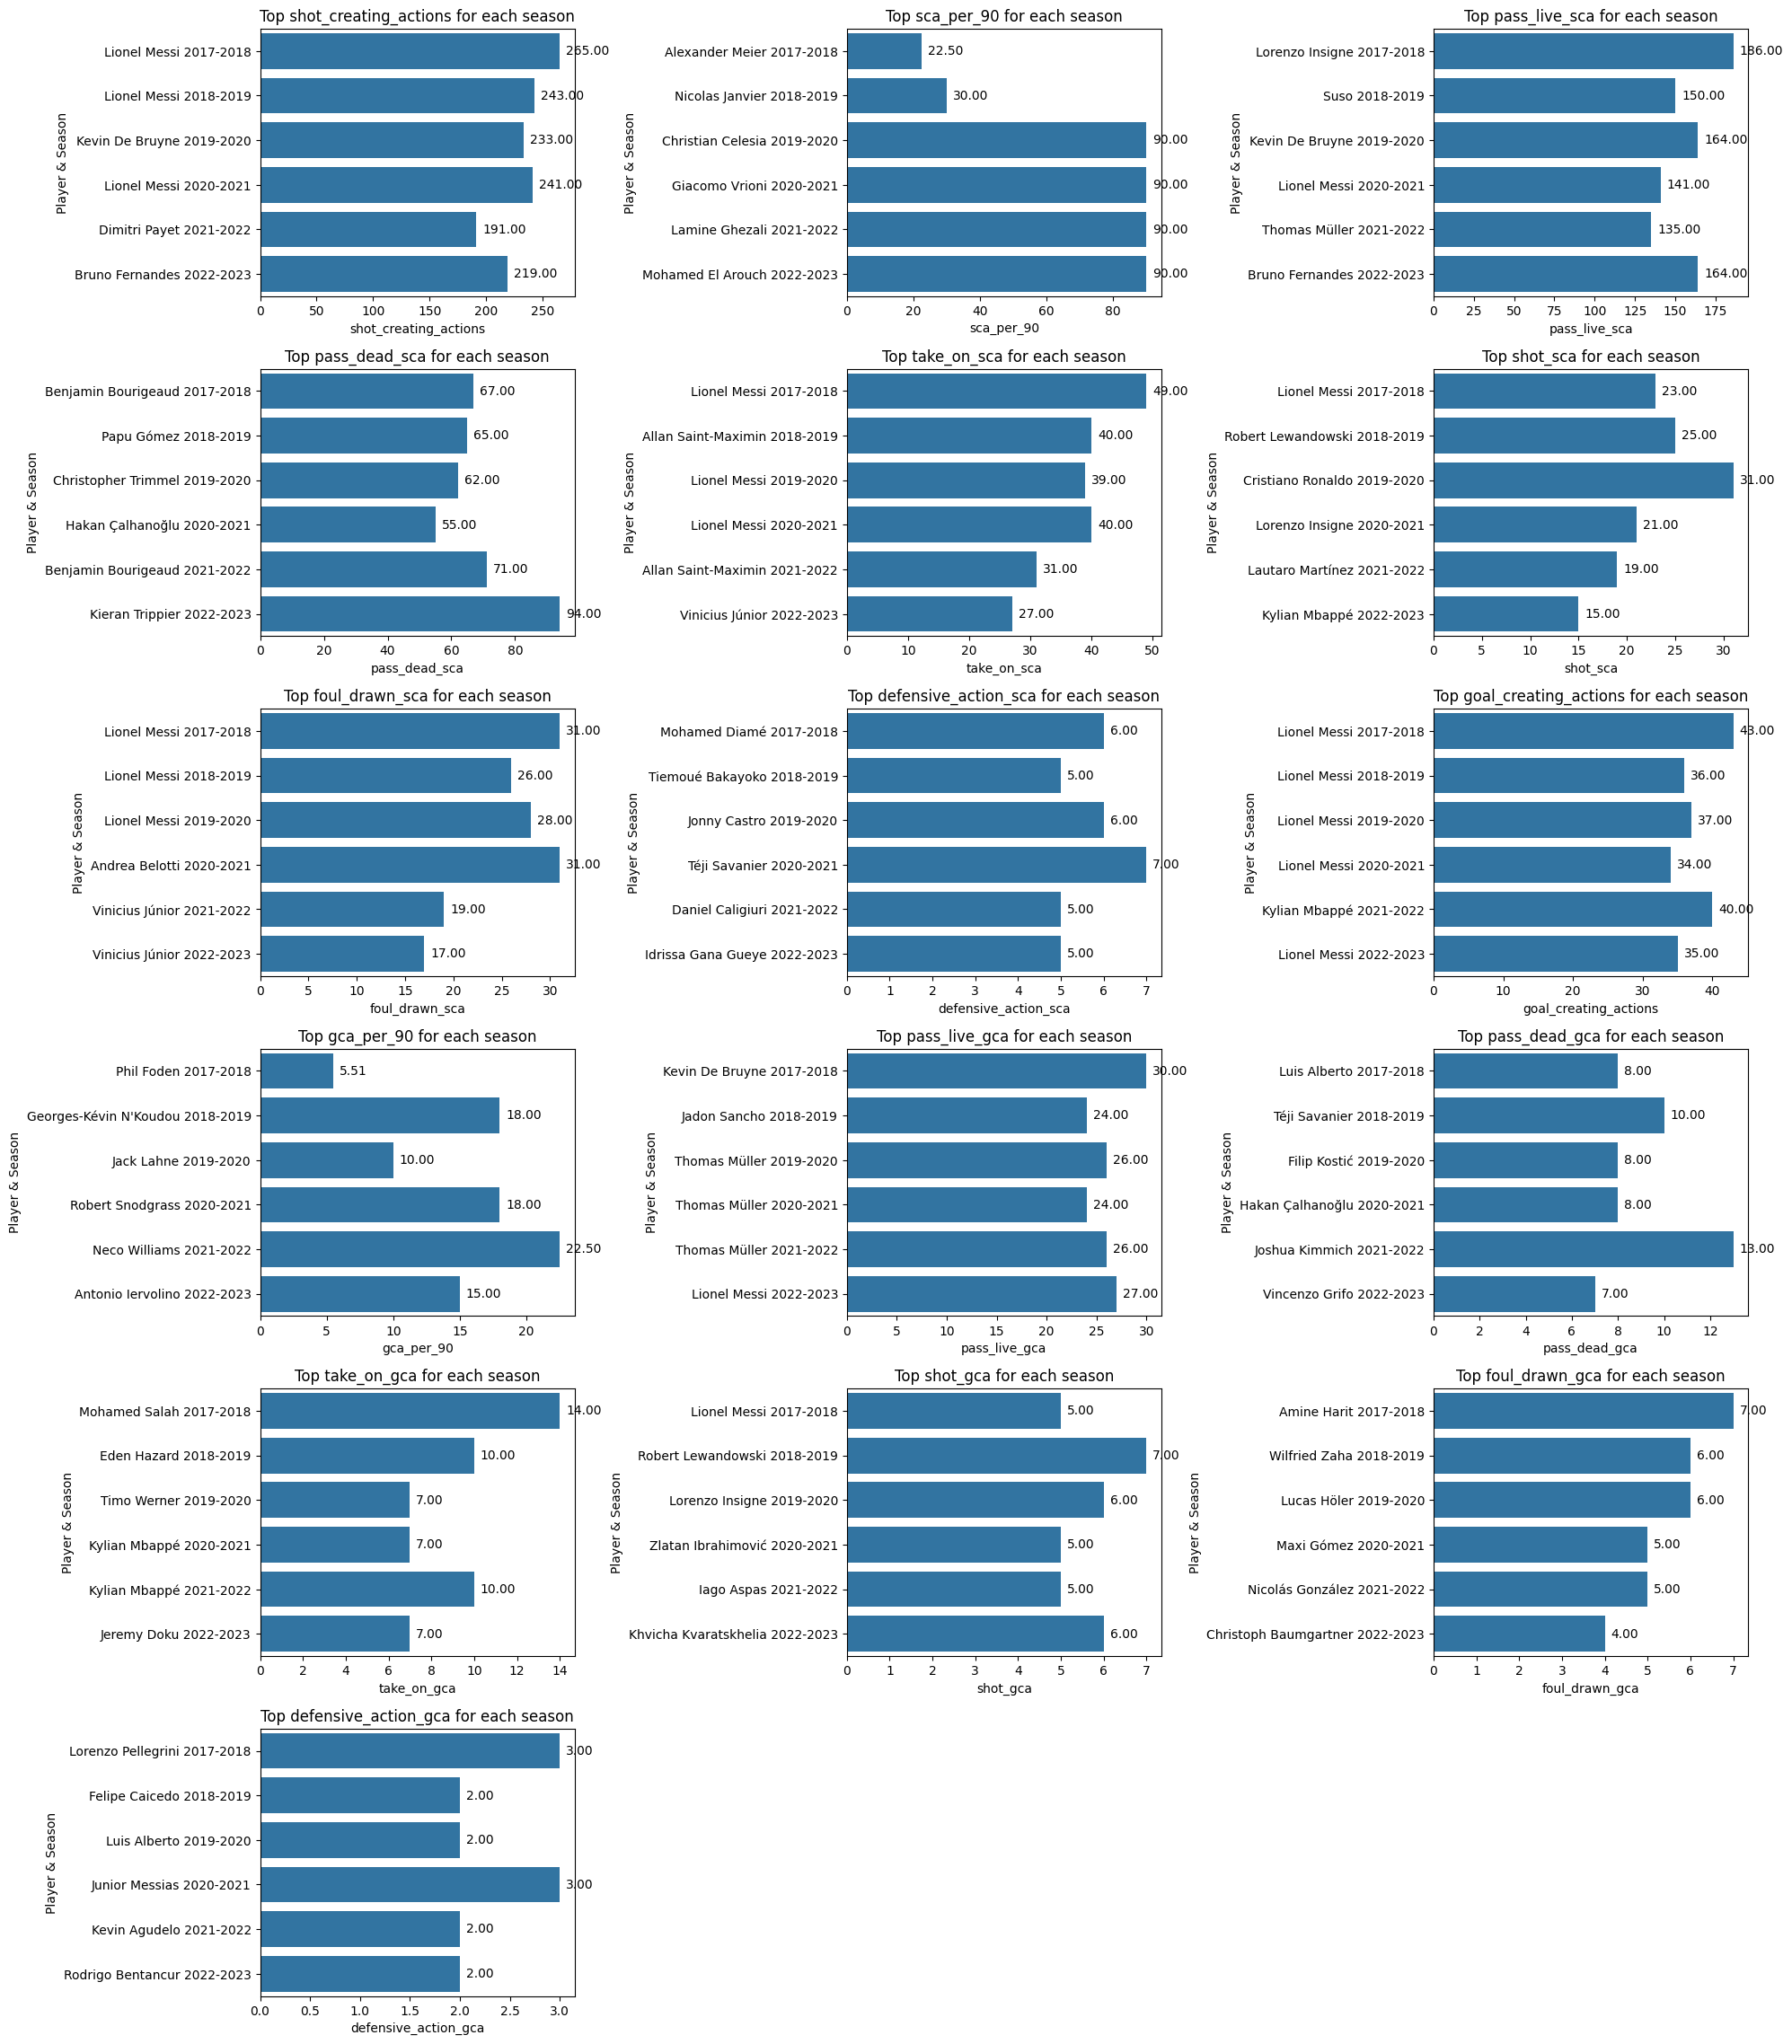

In [17]:
gca_plots.top_per_season(cols)

In [18]:
season_2023_24 = df.loc[df['season'] == '2023-2024']

what teams create the most shot and goal creating actions on average?

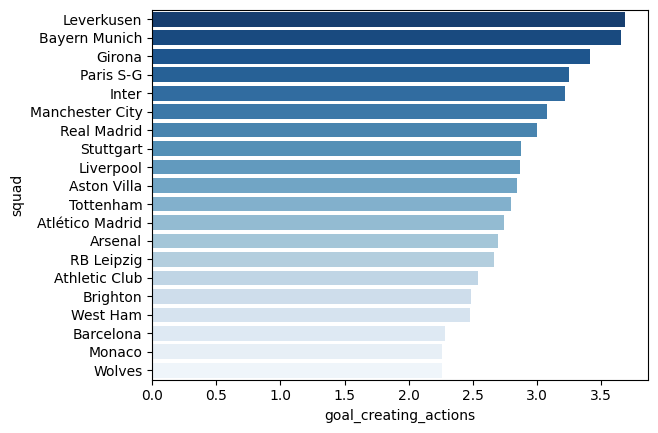

In [32]:
data = season_2023_24.groupby('squad')[['shot_creating_actions', 'goal_creating_actions']].mean().reset_index()

sns.barplot(data=data.sort_values(by='goal_creating_actions', ascending=False).head(20), x='goal_creating_actions', y='squad', palette='Blues_r')
plt.show()

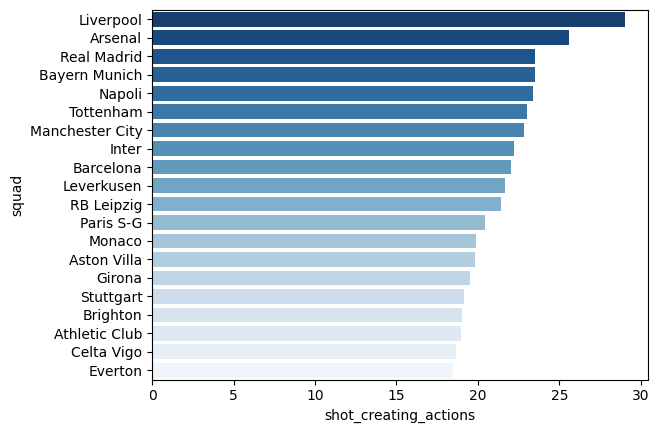

In [33]:
sns.barplot(data=data.sort_values(by='shot_creating_actions', ascending=False).head(20), x='shot_creating_actions', y='squad', palette='Blues_r')
plt.show()

In [44]:
def top_stat_league_plot(df: pd.DataFrame, groupby: str, column: Literal["shot_creating_actions", "goal_creating_actions"]):
    # for each league
    comps = df["comp"].unique()
    fig, axes = plt.subplots(2, 3, figsize=(20, 7))

    # delete empty plots
    for i in range(len(comps), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

    for comp, ax in zip(comps, axes.flatten()):
        data = (
            df.loc[df["comp"] == comp]
            .groupby(groupby)[["shot_creating_actions", "goal_creating_actions"]]
            .mean()
            .reset_index()
        )
        sns.barplot(
            data=data.sort_values(by=column, ascending=False).head(10),
            x=column,
            y=groupby,
            palette="Blues_r",
            ax=ax,
        )
        ax.set_title(comp)
    plt.tight_layout()

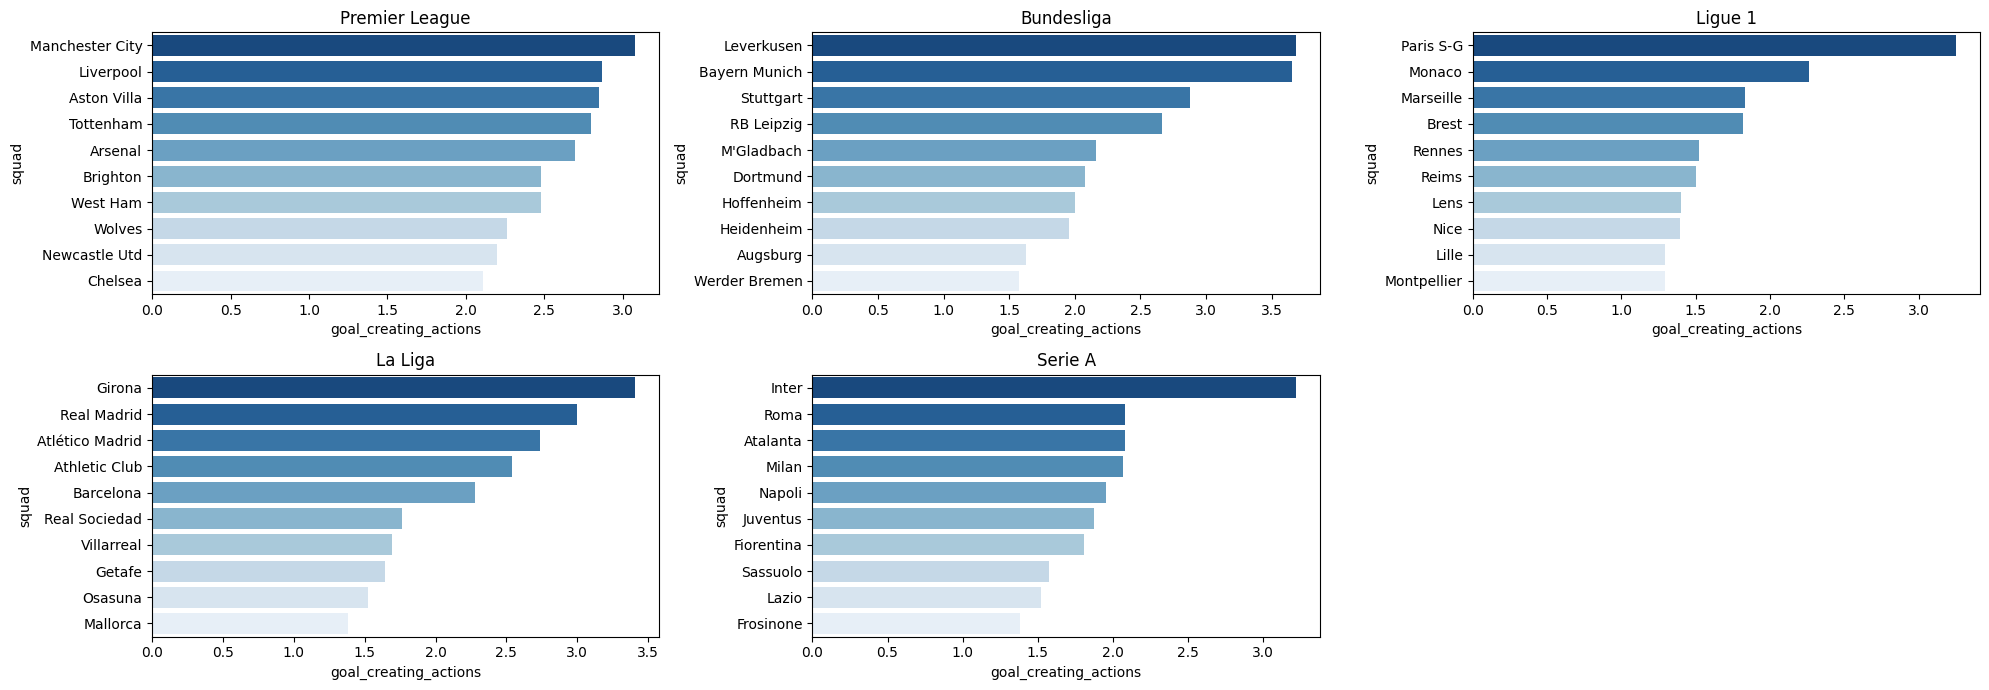

In [46]:
top_stat_league_plot(season_2023_24, "squad", "goal_creating_actions")

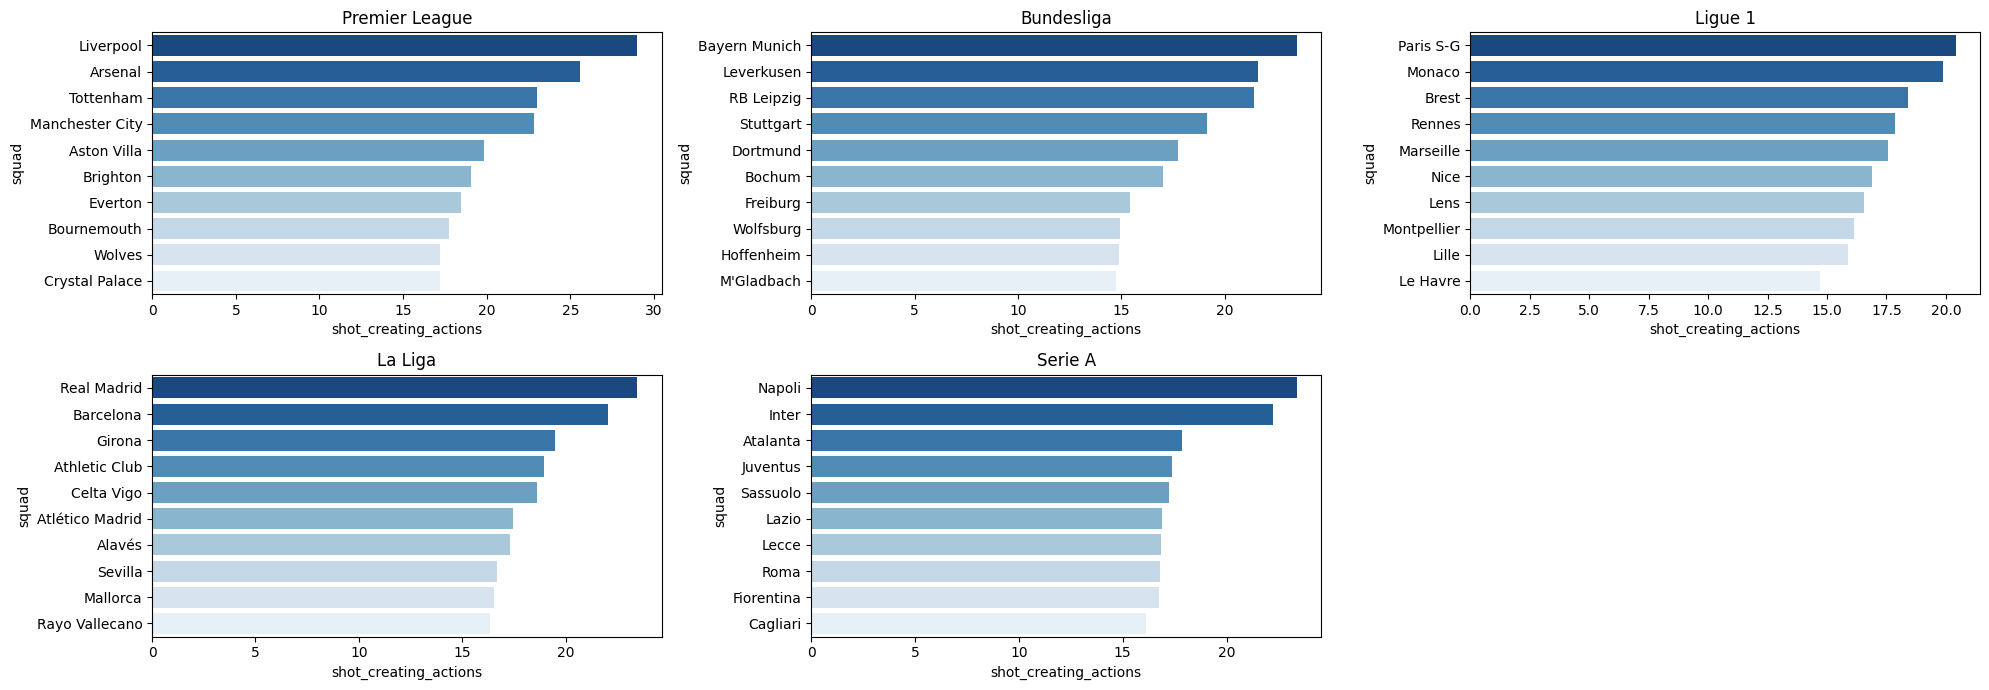

In [47]:
top_stat_league_plot(season_2023_24, "squad", "shot_creating_actions")

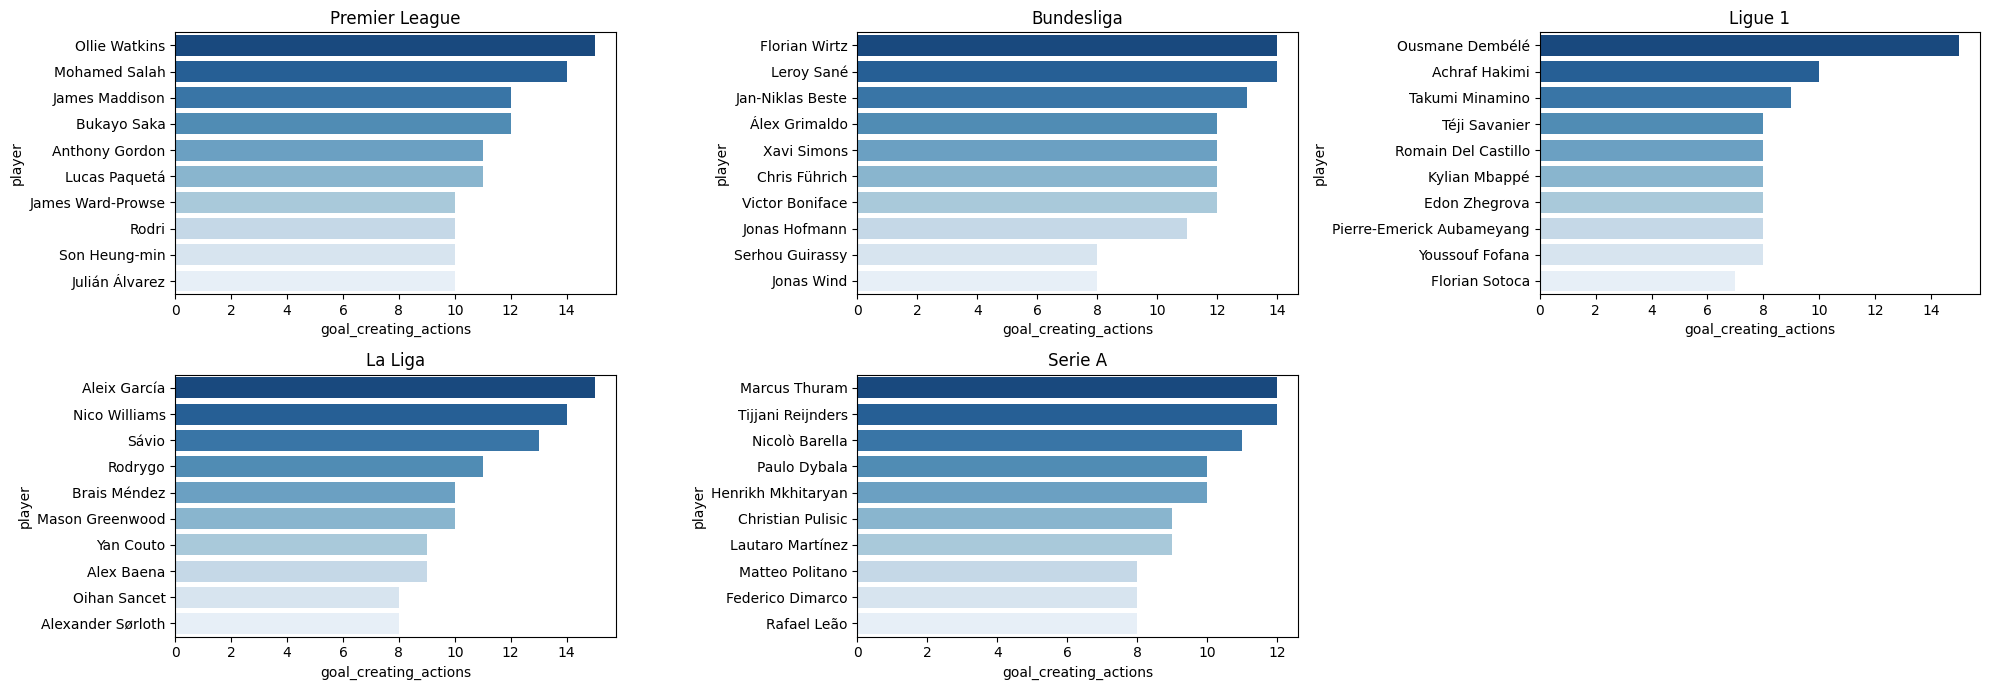

In [48]:
top_stat_league_plot(season_2023_24, "player", "goal_creating_actions")

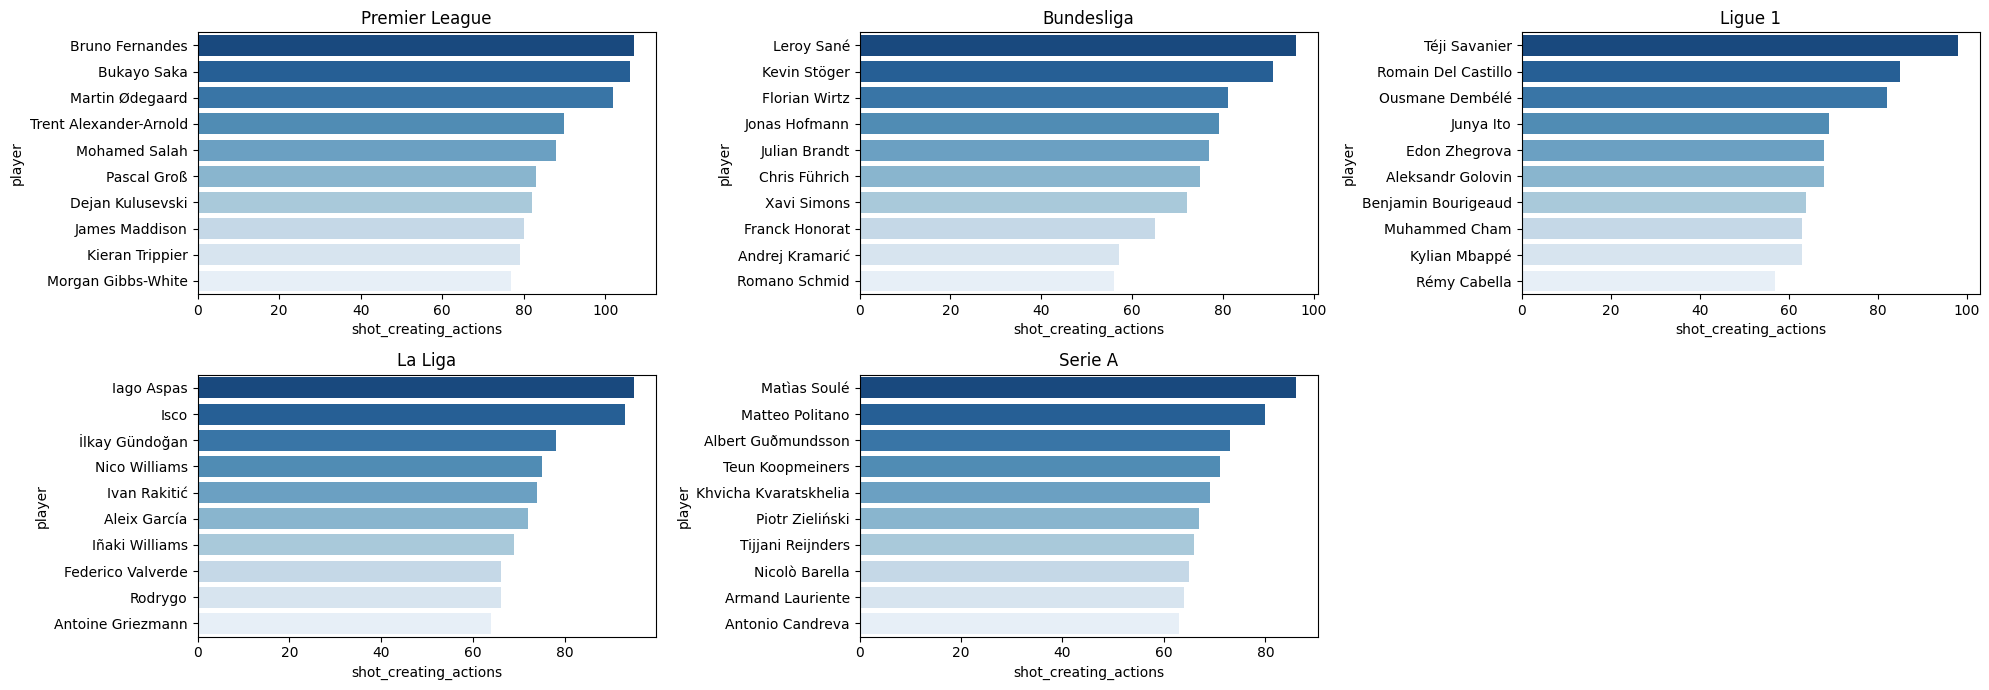

In [49]:
top_stat_league_plot(season_2023_24, "player", "shot_creating_actions")